In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from matplotlib import pyplot
df = pd.read_csv('OneHotDataset.csv')

In [2]:
#df.drop(df[df['SubjectID'] == 6.0].index, inplace = True) 

In [3]:
#df.drop(['SubjectID', 'VideoID', 'predefinedlabel'], axis=1, inplace=True)
df.head()

,CSE_110,CSE_111,CSE_230,CSE_260,CSE_330,CSE_340,CSE_420,CSE_421,CSE_422,CSE_427,...,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln
0,0,1,0,0,0,0,0,0,0,0,...,278,301963,90612,33735,23991,27946,45097,33228,8293,0
1,0,1,0,0,0,0,0,0,0,0,...,-50,73787,28083,1439,2240,2746,3687,5293,2740,0
2,0,1,0,0,0,0,0,0,0,0,...,101,758353,383745,201999,62107,36293,130536,57243,25354,0
3,0,1,0,0,0,0,0,0,0,0,...,-5,2012240,129350,61236,17084,11488,62462,49960,33932,0
4,0,1,0,0,0,0,0,0,0,0,...,-8,1005145,354328,37102,88881,45307,99603,44790,29749,0


In [4]:
X = df.drop('user-definedlabeln',axis=1).values
y = df['user-definedlabeln'].values

In [5]:
pt = PowerTransformer()
X_pt = pt.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pt, y, test_size=0.25, random_state=42)

RandomForest
____________________________
Accuracy: 0.8001873243833906
Precision: 0.7751277683134583
Recall: 0.8483530142945929
F1 Score: 0.8100890207715135
____________________________
Confusion Matrix: 
 [[1198  396]
 [ 244 1365]]
____________________________
False Positive Rate: 0.24843161856963614
False Negative Rate: 0.15164698570540713
____________________________
AUC: 0.880609034968765


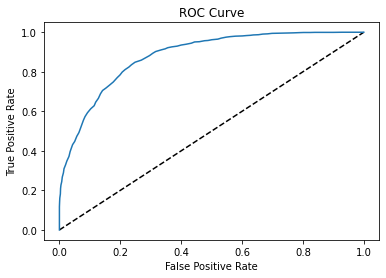

In [6]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=93)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print("RandomForest")
print("____________________________")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("____________________________")
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("____________________________")
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

y_pred_prob = rfc.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("____________________________")
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
#cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
#print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

In [7]:
input_cols = ['Att', 'M', 'R', 'D', 'T', 'A1', 'A2','B1', 'B2', 'G1', 'G2']

In [8]:
# importance = rfc.feature_importances_

# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
    
# # plot feature importance
# pyplot.bar([x for x in input_cols], importance)
# pyplot.figure(figsize=(100,10))
# pyplot.show()

Decision Tree
____________________________
Accuracy: 0.7283796440836715
Precision: 0.7211250748055057
Recall: 0.7489123679303915
F1 Score: 0.7347560975609755
____________________________
Confusion Matrix: 
 [[1128  466]
 [ 404 1205]]
____________________________
False Positive Rate: 0.2923462986198243
False Negative Rate: 0.2510876320696085
____________________________
AUC: 0.7282830346552835


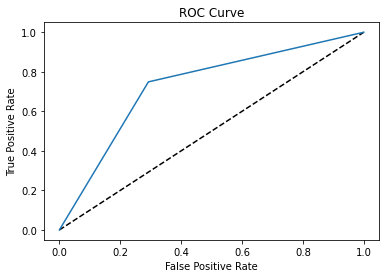

In [9]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Decision Tree")

print("____________________________")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("____________________________")
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("____________________________")
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

y_pred_prob = dt.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("____________________________")
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
#cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
#print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

In [10]:
# importance = dt.feature_importances_

# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
    
# # plot feature importance
# pyplot.bar([x for x in input_cols], importance)
# pyplot.figure(figsize=(100,10))
# pyplot.show()

GNB
____________________________
Accuracy: 0.6362784889166406
Precision: 0.6353658536585366
Recall: 0.6476072094468615
F1 Score: 0.641428131732841
____________________________
Confusion Matrix: 
 [[ 996  598]
 [ 567 1042]]
____________________________
False Positive Rate: 0.37515683814303635
False Negative Rate: 0.35239279055313855
____________________________
AUC: 0.7099880455998372


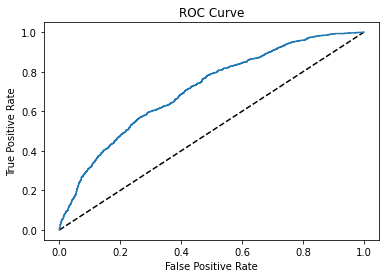

In [11]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=None , var_smoothing = 0.50)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("GNB")

print("____________________________")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("____________________________")
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("____________________________")
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

y_pred_prob = gnb.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("____________________________")
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
#cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
#print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

In [12]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(gnb, X_test, y_test)
print(imps.importances_mean)

[ 0.01985638  0.00867936 -0.00249766  0.00162348  0.00068686 -0.00349672
 -0.00131127  0.01236341  0.02647518 -0.00012488 -0.00337184  0.00068686
 -0.00137371 -0.00424602 -0.00743053 -0.00543241 -0.00668124 -0.00636903
 -0.00455823 -0.00524508 -0.00711833]


KNN
____________________________
Accuracy: 0.7995629097720887
Precision: 0.7761279268989149
Recall: 0.8446239900559354
F1 Score: 0.8089285714285714
____________________________
Confusion Matrix: 
 [[1202  392]
 [ 250 1359]]
____________________________
False Positive Rate: 0.24592220828105393
False Negative Rate: 0.15537600994406464
____________________________
AUC: 0.8766273541317541


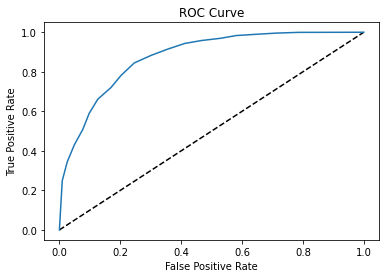

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KNN")
print("____________________________")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("____________________________")
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("____________________________")
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

y_pred_prob = knn.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("____________________________")
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
#cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
#print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

GBC
____________________________
Accuracy: 0.7727130814861067
Precision: 0.7462269424259362
Recall: 0.8297078931013051
F1 Score: 0.7857563272513243
____________________________
Confusion Matrix: 
 [[1140  454]
 [ 274 1335]]
____________________________
False Positive Rate: 0.2848180677540778
False Negative Rate: 0.1702921068986949
____________________________
AUC: 0.8510776505743648


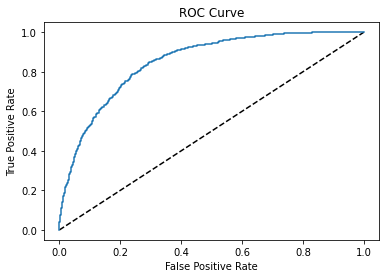

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0, learning_rate=0.01, max_depth=29, n_estimators=200,subsample=0.1 )
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print("GBC")

print("____________________________")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("____________________________")
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("____________________________")
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

y_pred_prob = gbc.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("____________________________")
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
#cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
#print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

In [15]:
# importance = gbc.feature_importances_

# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
    
# # plot feature importance
# pyplot.bar([x for x in input_cols], importance)
# pyplot.figure(figsize=(100,10))
# pyplot.show()

XGB
____________________________
Accuracy: 0.7998751170777396
Precision: 0.7765714285714286
Recall: 0.8446239900559354
F1 Score: 0.8091693956534682
____________________________
Confusion Matrix: 
 [[1203  391]
 [ 250 1359]]
____________________________
False Positive Rate: 0.2452948557089084
False Negative Rate: 0.15537600994406464
____________________________
AUC: 0.8825142918635998


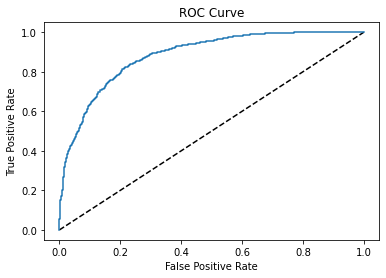

In [16]:
from xgboost import XGBClassifier
xgb = XGBClassifier(colsample_bytree=0.7,gamma=0.3,learning_rate=0.05,max_depth=12)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("XGB")

print("____________________________")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("____________________________")
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("____________________________")
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

y_pred_prob = xgb.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("____________________________")
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
#cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
#print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

In [17]:
# importance = xgb.feature_importances_

# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
    
# # plot feature importance
# pyplot.bar([x for x in input_cols], importance)
# pyplot.figure(figsize=(100,10))
# pyplot.show()

Bagging
____________________________
Accuracy: 0.7998751170777396
Precision: 0.7719101123595505
Recall: 0.8539465506525793
F1 Score: 0.8108586603717911
____________________________
Confusion Matrix: 
 [[1188  406]
 [ 235 1374]]
____________________________
False Positive Rate: 0.2547051442910916
False Negative Rate: 0.1460534493474207
____________________________
AUC: 0.876103520582545


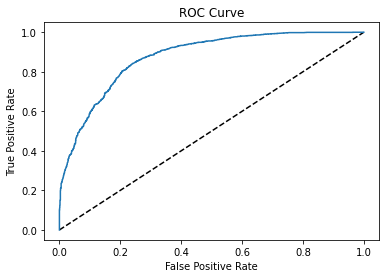

In [18]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(base_estimator=rfc, n_estimators=20, random_state=1)
bc.fit(X_train, y_train)

y_pred = bc.predict(X_test)
print("Bagging")
print("____________________________")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("____________________________")
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("____________________________")
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

y_pred_prob = bc.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("____________________________")
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
#cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
#print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()